# TP3
Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en  
Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

## Parte 1
Obtener una detección del logo en cada imagen sin falsos positivos

In [152]:
# Importamos librerias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [153]:
# cargamos imagenes
img_l1 = cv.imread('./images/coca_logo_1.png')
img_l2 = cv.imread('./images/coca_logo_2.png')
img_L = cv.imread('./images/COCA-COLA-LOGO.jpg')
img_multi = cv.imread('./images/coca_multi.png')
img_re1 = cv.imread('./images/coca_retro_1.png')
img_re2 = cv.imread('./images/coca_retro_2.png')
img_logo = cv.imread('./images/logo_1.png')

# pasamos a rgb
img_l1_rgb = cv.cvtColor(img_l1, cv.COLOR_BGR2RGB)
img_l2_rgb = cv.cvtColor(img_l2, cv.COLOR_BGR2RGB)
img_L_rgb = cv.cvtColor(img_L, cv.COLOR_BGR2RGB)
img_multi_rgb = cv.cvtColor(img_multi, cv.COLOR_BGR2RGB)
img_re1_rgb = cv.cvtColor(img_re1, cv.COLOR_BGR2RGB)
img_re2_rgb = cv.cvtColor(img_re2, cv.COLOR_BGR2RGB)
img_logo_rgb = cv.cvtColor(img_logo, cv.COLOR_BGR2RGB)

# pasamos a escala de grises
img_l1_gray = cv.cvtColor(img_l1, cv.COLOR_BGR2GRAY)
img_l2_gray = cv.cvtColor(img_l2, cv.COLOR_BGR2GRAY)
img_L_gray = cv.cvtColor(img_L, cv.COLOR_BGR2GRAY)
img_multi_gray = cv.cvtColor(img_multi, cv.COLOR_BGR2GRAY)
img_re1_gray = cv.cvtColor(img_re1, cv.COLOR_BGR2GRAY)
img_re2_gray = cv.cvtColor(img_re2, cv.COLOR_BGR2GRAY)
img_logo_gray = cv.cvtColor(img_logo, cv.COLOR_BGR2GRAY)

# cargamos template
template = cv.imread('./template/pattern.png',0)

/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_1778/2554607716.py:9: UserWarning: The figure layout has changed to tight
  figure.tight_layout(pad=1)


<function matplotlib.pyplot.show(close=None, block=None)>

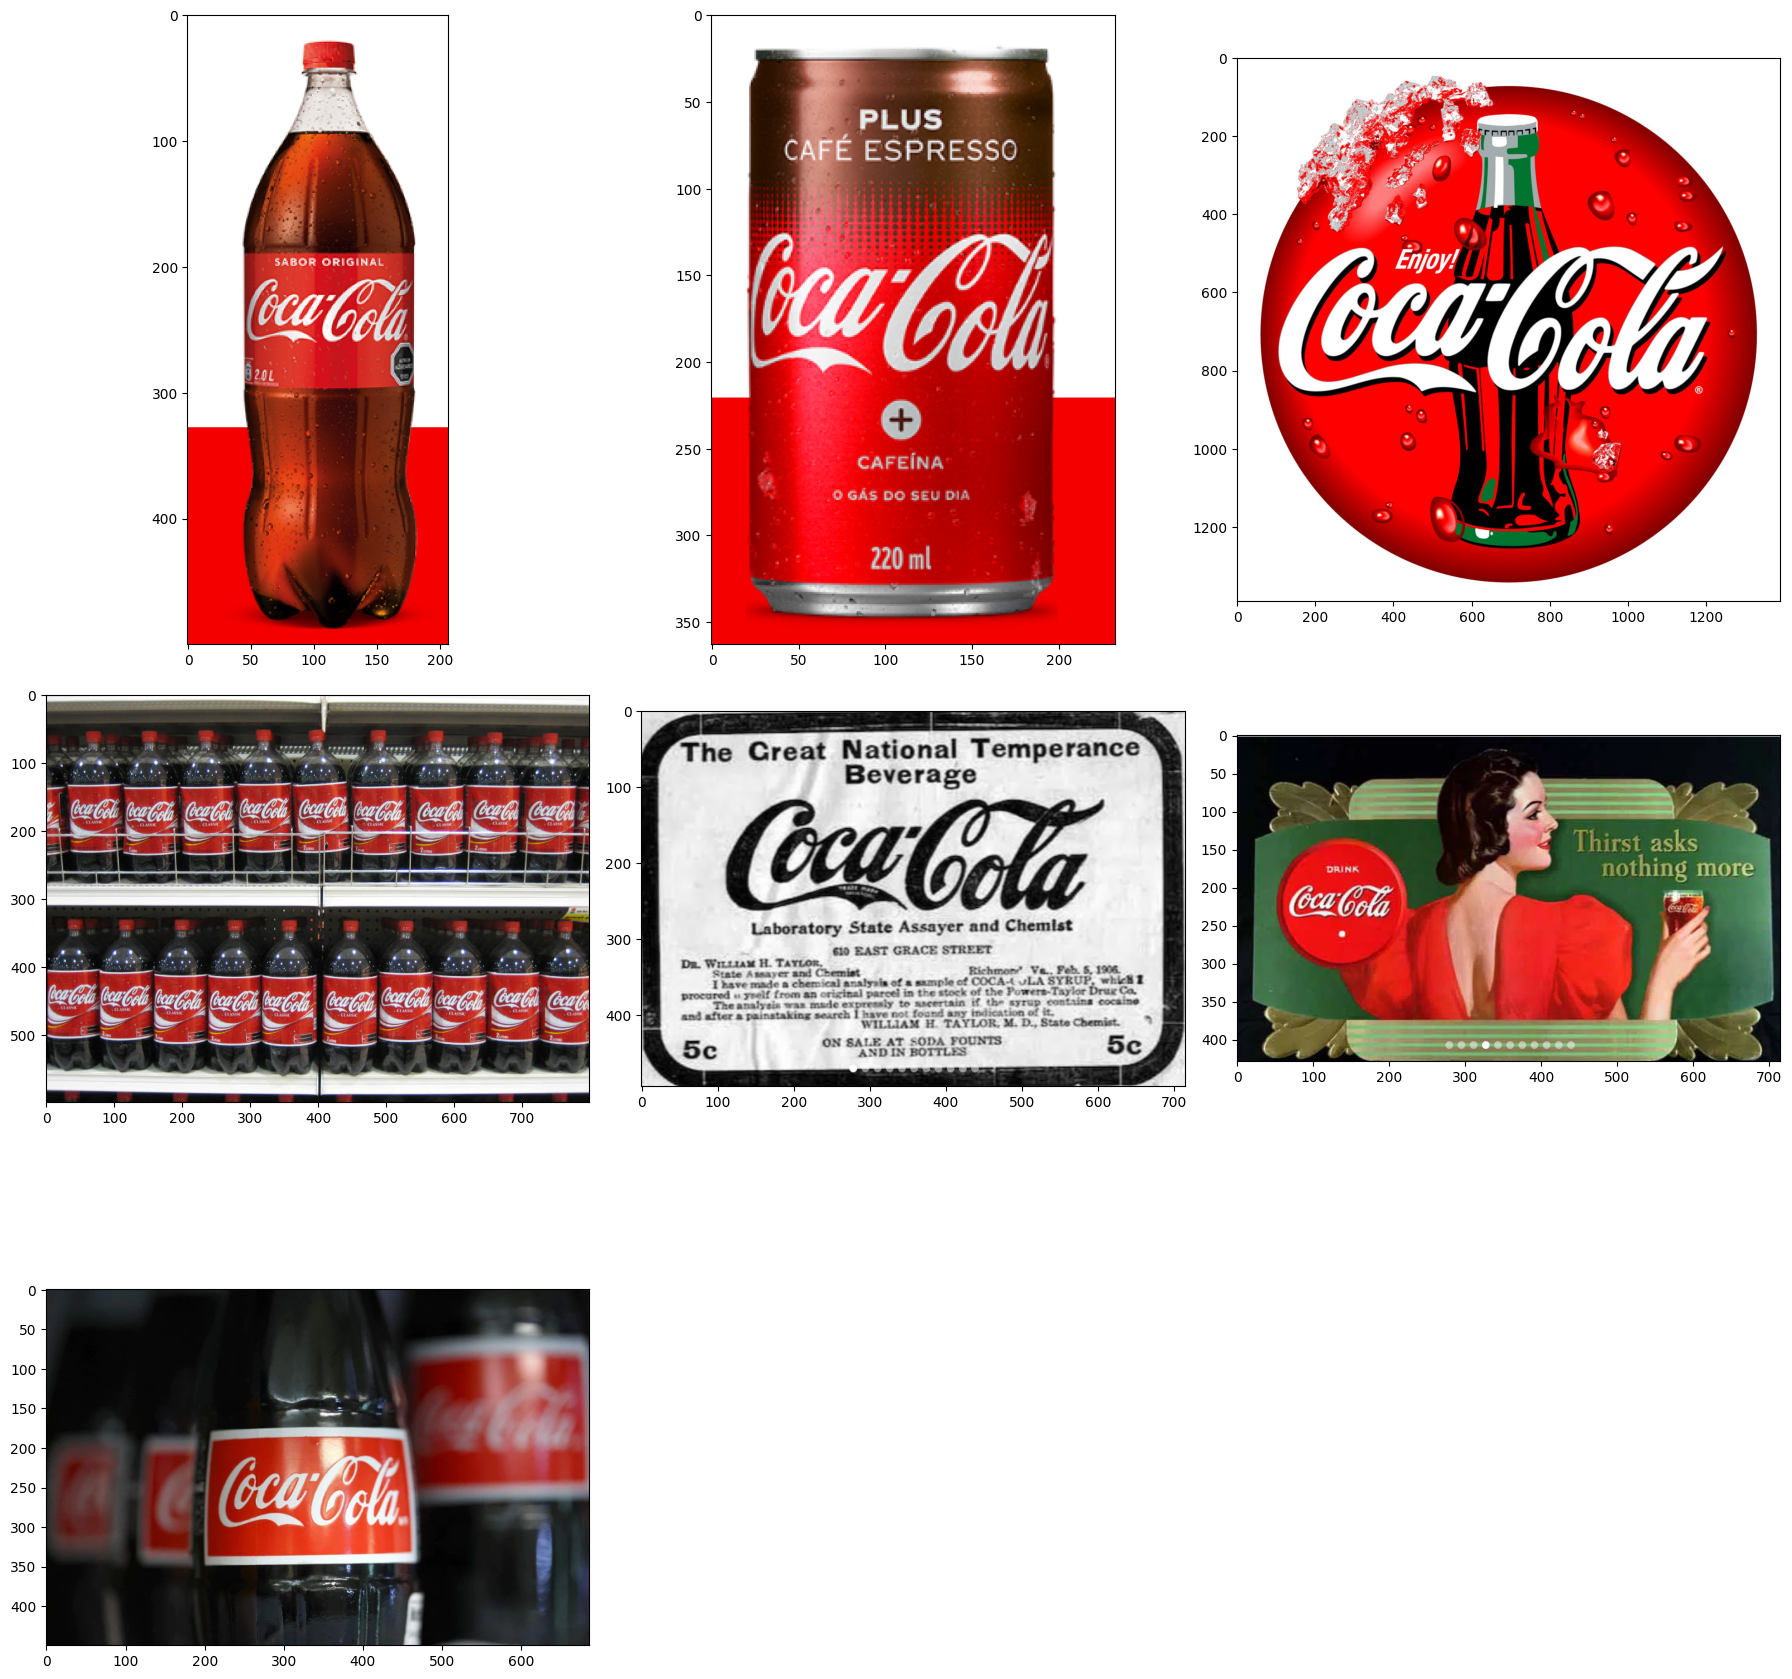

In [154]:
# imprimimos imagenes
images_list = [img_l1_rgb, img_l2_rgb, img_L_rgb,
               img_multi_rgb, img_re1_rgb, img_re2_rgb, 
               img_logo_rgb]
figure = plt.figure(figsize=(18,18))
for i in range(len(images_list)):
    figure.add_subplot(3, 3, i+1)
    plt.imshow(images_list[i])
    figure.tight_layout(pad=1)
plt.show

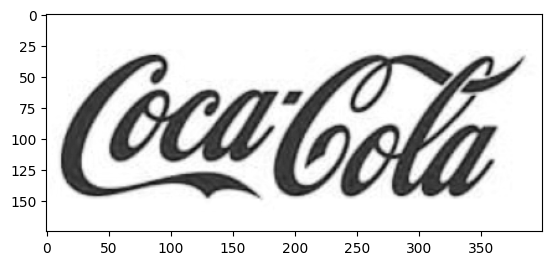

In [155]:
# mostramos template 
plt.imshow(template, cmap='gray')

**Observacion**

Como primera observacion el template para algunas imagenes mostradas anteriormente, queda muy chico o muy grande, es decir, dependiendo de la imagen podemos tener un problema con la escala.

In [156]:
w_template, h_template = template.shape[::-1]
print(f"Template -> Ancho: {w_template}, Altura: {h_template}")

Template -> Ancho: 400, Altura: 175


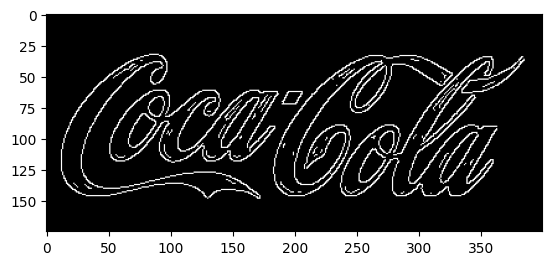

In [157]:
"""
Aplicamos canny para deteccion de bordes en la plantilla
para aumentar la efectividad de la deteccion.
"""
template_canny = cv.Canny(template, threshold1=50, threshold2=100)
plt.imshow(template_canny, cmap='gray')

Imagen más pequeña que el logo
best scale 0.7333333333333333


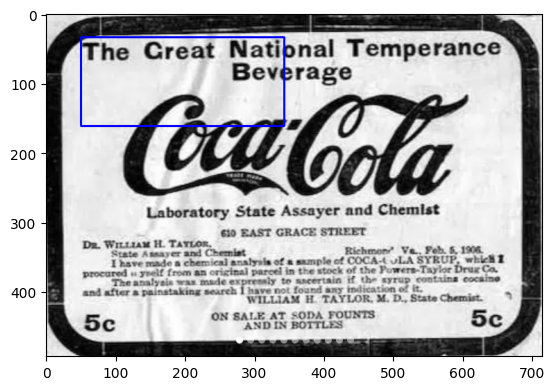

In [158]:
# escogemos el metodo para el template match
method = eval('cv.TM_CCOEFF_NORMED')

## ajustamos la escala de la imagen para que funcione el template match
# Iteramos sobre 10 escalas de 0.1 -> 1.0
scales = np.linspace(0.1, 2.0, 10)[::-1]

# best_val nos dara el mejor valor de correlacion
best_val = 0

# best_match nos dara la mejor ubicacion y la escala
best_match = 0

for scale in scales:
    img_resize = cv.resize(img_re1_gray, None, fx=scale, fy=scale)

    w_resize, h_resize = img_resize.shape[::-1]

    if w_resize < w_template or h_resize < h_template:
        print("Imagen más pequeña que el logo")
        break

    """
    Aplicamos canny para deteccion de bordes tambien en la imagen
    para aumentar la efectividad de la deteccion del logo.
    """
    img_edge = cv.Canny(img_resize, 50,200)

    # aplicamos template match -> sale mapa de calor
    tem_match = cv.matchTemplate(img_edge, template_canny, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(tem_match)

    # Comparamos para encontrar el best_value donde la corr sea mayor
    if max_val > best_val:
        best_val = max_val
        best_match = (max_loc, scale)
        last_tem_match = tem_match

# tomamos esquina superior izquierda
top_left, best_scale = best_match
print(f'best scale {best_scale}')

# creamos bordes del rectangulo para el logo detectado
top_left_scaled = (int(top_left[0] * best_scale), int(top_left[1] * best_scale))
bottom_right = (int((top_left[0] + w_template)* best_scale), int((top_left[1] + h_template) * best_scale))

# Dibujamos rectangulo
img_output = img_re1_rgb.copy()
#img_output = img_resize
cv.rectangle(img_output,top_left_scaled, bottom_right, color=(0,0,255),thickness=2)

# graficamos
plt.imshow(img_output)
